# Starbucks Capstone (Predict Next Purchase Time)

# Business Problem
We want to make sure we are targeting our promotional offers, such as discounts and buy-one, get-one, in a way that will generate the most revenue. If we can predict each customer's next purchase day, then we'll know which customers won't need offers because we expect them to make a purchase within a certain time frame with or without an offer. An offer then could be used if a customer hasn't made a purchase within the predicted time frame.

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll be importing two dataframes

# transcript_df
**person:** customer id<br>
**event:** offer received, offer viewed, offer completed, transaction<br>
**value:** offer id or transaction amount<br>
**time:** timeline of dataframe in hours<br>

In [257]:
transcript_df = pd.read_csv('transcript.csv')

In [258]:
transcript_df.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [259]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [260]:
transcript_df.describe()

,Unnamed: 0,time
count,306534.000000,306534.000000
mean,153266.500000,366.382940
std,88488.888045,200.326314
min,0.000000,0.000000
25%,76633.250000,186.000000
50%,153266.500000,408.000000
75%,229899.750000,528.000000
max,306533.000000,714.000000


# Full disclosure
The value columns in the portfolio_df originally looked like this: {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'} or like this {'amount': 34.56} when the 'event' value was transaction. We couldn't figure out a way to programmatically clean that up. So we went into the csv and did some find-replaces to delete the unneeded characters.

# profile_df
**gender**<br>
**age**<br>
**id:** customer id<br>
**became_member_on:** date customer joined app<br>
**income**

In [261]:
profile_df = pd.read_csv('profile.csv')

In [262]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [263]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [264]:
profile_df.describe()

,Unnamed: 0,age,became_member_on,income
count,17000.000000,17000.000000,1.700000e+04,14825.000000
mean,8499.500000,62.531412,2.016703e+07,65404.991568
std,4907.621624,26.738580,1.167750e+04,21598.299410
min,0.000000,18.000000,2.013073e+07,30000.000000
25%,4249.750000,45.000000,2.016053e+07,49000.000000
50%,8499.500000,58.000000,2.017080e+07,64000.000000
75%,12749.250000,73.000000,2.017123e+07,80000.000000
max,16999.000000,118.000000,2.018073e+07,120000.000000


# 17,000 customers
We see here that the length of profile_df is the same as the number of unique 'person' values in transcript_df. So it's apparent we have data on 17,000 Starbucks customers.

In [265]:
len(profile_df)

17000

In [266]:
transcript_df['person'].nunique()

17000

And it looks like more than 2,000 of them are 118 years old

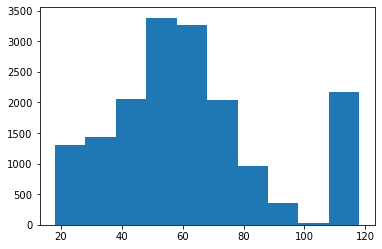

In [267]:
plt.hist(profile_df['age']);

In [268]:
df_118 = profile_df[profile_df['age'] == 118]

In [269]:
df_118.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN


In [270]:
df_118.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 16994
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2175 non-null   int64  
 1   gender            0 non-null      object 
 2   age               2175 non-null   int64  
 3   id                2175 non-null   object 
 4   became_member_on  2175 non-null   int64  
 5   income            0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 118.9+ KB


# Hidden missing value
It turns out that all of our 118-year-old customers are missing gender and income values. So it looks like 118 is just a default value for missing ages. We'll filter the 118-year-olds out of this dataframe.

In [271]:
profile_df = profile_df[profile_df['age'] != 118]

In [272]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [273]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14825 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               14825 non-null  int64  
 3   id                14825 non-null  object 
 4   became_member_on  14825 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 810.7+ KB


We'll change became_member_on column to datetime.

In [274]:
import datetime

In [275]:
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')

In [276]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [277]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        14825 non-null  int64         
 1   gender            14825 non-null  object        
 2   age               14825 non-null  int64         
 3   id                14825 non-null  object        
 4   became_member_on  14825 non-null  datetime64[ns]
 5   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 810.7+ KB


# Downstream discovery
We're actually circling back here because we discovered downstream that there also are hidden missing values of 'O' in the gender column. We'll fix that here and drop 212 rows.

In [278]:
profile_df['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [279]:
profile_df = profile_df[profile_df.gender != 'O']

In [280]:
profile_df.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [281]:
profile_df['gender'].value_counts()

M    8484
F    6129
Name: gender, dtype: int64

In [282]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14613 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        14613 non-null  int64         
 1   gender            14613 non-null  object        
 2   age               14613 non-null  int64         
 3   id                14613 non-null  object        
 4   became_member_on  14613 non-null  datetime64[ns]
 5   income            14613 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 799.1+ KB


Both dataframes have a column that just repeats the index. We'll drop those now.

In [283]:
list_of_dfs = [transcript_df, profile_df]

In [284]:
for df in list_of_dfs:
    df.drop(columns = ['Unnamed: 0'], inplace = True)

In [285]:
transcript_df.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [286]:
profile_df.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


# A closer look at transcript_df
If we sort transcript_df by person and time, we have a timeline for each customer. We also see that we have a lot of IDs that indicate an offer that was received, viewed or completed. It might be helpful to know whether or not a customer is making a purchase to complete an offer, and what kind of offer it was. However, it complicates our timeline a little bit. Recency, frequency and monetary value are at the heart of customer value. What we really need to know is how recent the customer's last purchase was, how frequently the customer buys from us and the value of that customer's transcations. As we said when describing our business problem, we can make better use of our offers when we know the customer's next purchase time.

In [287]:
transcript_df.sort_values(by = ['person', 'time']).head(25)

,person,event,value,time
55972,0009655768c64bdeb2e877511632db8f,offer received,5a8bc65990b245e5a138643cd4eb9837,168
77705,0009655768c64bdeb2e877511632db8f,offer viewed,5a8bc65990b245e5a138643cd4eb9837,192
89291,0009655768c64bdeb2e877511632db8f,transaction,22.16,228
113605,0009655768c64bdeb2e877511632db8f,offer received,3f207df678b143eea3cee63160fa8bed,336
139992,0009655768c64bdeb2e877511632db8f,offer viewed,3f207df678b143eea3cee63160fa8bed,372
153401,0009655768c64bdeb2e877511632db8f,offer received,f19421c1d4aa40978ebb69ca19b0e20d,408
168412,0009655768c64bdeb2e877511632db8f,transaction,8.57,414
168413,0009655768c64bdeb2e877511632db8f,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,414
187554,0009655768c64bdeb2e877511632db8f,offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,456
204340,0009655768c64bdeb2e877511632db8f,offer received,fafdcd668e3743c1bb461111dcafc2a4,504


In [288]:
len(transcript_df)

306534

In [289]:
transcript_df['person'].nunique()

17000

So we'll only keep rows that indicate a transaction being made.

In [290]:
transcript_df = transcript_df[transcript_df['event'] == 'transaction']

In [291]:
len(transcript_df)

138953

In [292]:
transcript_df.head()

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0.8300000000000001,0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,0
12659,54890f68699049c2a04d415abc25e717,transaction,13.23,0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,0


We see here that we've filtered out customers who never made transactions. The number of unique customers has gone from 17,000 to 16,578.

In [293]:
transcript_df['person'].nunique()

16578

In [294]:
transcript_df.sort_values(by = ['person', 'time']).head(25)

,person,event,value,time
89291,0009655768c64bdeb2e877511632db8f,transaction,22.16,228
168412,0009655768c64bdeb2e877511632db8f,transaction,8.57,414
228422,0009655768c64bdeb2e877511632db8f,transaction,14.11,528
237784,0009655768c64bdeb2e877511632db8f,transaction,13.56,552
258883,0009655768c64bdeb2e877511632db8f,transaction,10.27,576
293497,0009655768c64bdeb2e877511632db8f,transaction,12.36,660
300930,0009655768c64bdeb2e877511632db8f,transaction,28.16,690
302205,0009655768c64bdeb2e877511632db8f,transaction,18.41,696
104088,00116118485d4dfda04fdbaba9a87b5c,transaction,0.7000000000000001,294
187632,00116118485d4dfda04fdbaba9a87b5c,transaction,0.2,456


In [295]:
transcript_df = transcript_df.drop(columns = ['event'])

In [296]:
transcript_df.head()

,person,value,time
12654,02c083884c7d45b39cc68e1314fec56c,0.8300000000000001,0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56,0
12659,54890f68699049c2a04d415abc25e717,13.23,0
12670,b2f1cd155b864803ad8334cdf13c4bd2,19.51,0
12671,fe97aa22dd3e48c8b143116a8403dd52,18.97,0


In [297]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  138953 non-null  object
 1   value   138953 non-null  object
 2   time    138953 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


We need to turn the value column into a float.

In [298]:
transcript_df['value'] = transcript_df['value'].astype(float)

In [299]:
transcript_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   person  138953 non-null  object 
 1   value   138953 non-null  float64
 2   time    138953 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [300]:
transcript_df.describe()

,value,time
count,138953.000000,138953.000000
mean,12.777356,381.584334
std,30.250529,201.697230
min,0.050000,0.000000
25%,2.780000,210.000000
50%,8.890000,402.000000
75%,18.070000,552.000000
max,1062.280000,714.000000


# Over 1000?
Are there really customers who spend more than 1000 bucks in a single transaction? We see that 75 percent of the transactions are for 18 dollars or less, but the max is more than 1000. Let's investigate further.

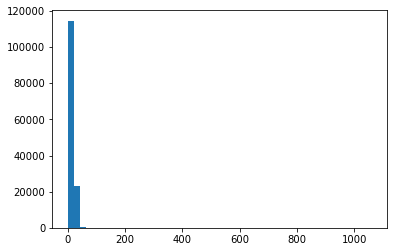

In [301]:
plt.hist(transcript_df['value'], bins = 50);

Let's look at the really high percentiles. We see that 99.5 percent of transactions are for 50 dollars or less.


In [302]:
np.percentile(transcript_df['value'], 95)

29.91

In [303]:
np.percentile(transcript_df['value'], 98)

35.41

In [304]:
np.percentile(transcript_df['value'], 99)

40.01960000000021

In [305]:
np.percentile(transcript_df['value'], 99.5)

50.412399999999906

So let's take a look at everyone who spends 75 or more in a single transaction. There are 572 of those people, less than half of one percent. 560 of those people are unique. So it's not just a few high rollers. Maybe it's corporate customers? We'll have to keep an eye on this and maybe look at average income when we merge with the dataframe that contains that column.

In [306]:
over_75 = transcript_df[transcript_df['value'] >= 75]

In [307]:
len(over_75)

572

In [308]:
over_75['person'].nunique()

560

# New dataframe
So let's create a new dataframe sorted by customer and time with a fresh index. 

In [309]:
starbucks_cust = transcript_df.sort_values(by = ['person', 'time'], ignore_index = True)

In [310]:
starbucks_cust.head()

,person,value,time
0,0009655768c64bdeb2e877511632db8f,22.16,228
1,0009655768c64bdeb2e877511632db8f,8.57,414
2,0009655768c64bdeb2e877511632db8f,14.11,528
3,0009655768c64bdeb2e877511632db8f,13.56,552
4,0009655768c64bdeb2e877511632db8f,10.27,576


In [311]:
starbucks_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138953 entries, 0 to 138952
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   person  138953 non-null  object 
 1   value   138953 non-null  float64
 2   time    138953 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


# Merging dataframes
We'll merge starbucks_cust with profile_df. First we need to change name of the id column in profile_df to 'person.'

In [312]:
profile_df.rename(columns = {'id':'person'}, inplace = True)

In [313]:
profile_df.head()

,gender,age,person,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [314]:
starbucks_df = pd.merge(starbucks_cust, profile_df, how = 'inner', on = 'person')

In [315]:
starbucks_df.head(20)

,person,value,time,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,22.16,228,M,33,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,8.57,414,M,33,2017-04-21,72000.0
2,0009655768c64bdeb2e877511632db8f,14.11,528,M,33,2017-04-21,72000.0
3,0009655768c64bdeb2e877511632db8f,13.56,552,M,33,2017-04-21,72000.0
4,0009655768c64bdeb2e877511632db8f,10.27,576,M,33,2017-04-21,72000.0
5,0009655768c64bdeb2e877511632db8f,12.36,660,M,33,2017-04-21,72000.0
6,0009655768c64bdeb2e877511632db8f,28.16,690,M,33,2017-04-21,72000.0
7,0009655768c64bdeb2e877511632db8f,18.41,696,M,33,2017-04-21,72000.0
8,0020c2b971eb4e9188eac86d93036a77,17.63,54,F,59,2016-03-04,90000.0
9,0020c2b971eb4e9188eac86d93036a77,32.00,66,F,59,2016-03-04,90000.0


In [316]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122176 entries, 0 to 122175
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   person            122176 non-null  object        
 1   value             122176 non-null  float64       
 2   time              122176 non-null  int64         
 3   gender            122176 non-null  object        
 4   age               122176 non-null  int64         
 5   became_member_on  122176 non-null  datetime64[ns]
 6   income            122176 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.5+ MB


In [317]:
starbucks_df.tail()

,person,value,time,gender,age,became_member_on,income
122171,ffff82501cea40309d5fdd7edcca4a07,13.17,498,F,45,2016-11-25,62000.0
122172,ffff82501cea40309d5fdd7edcca4a07,7.79,504,F,45,2016-11-25,62000.0
122173,ffff82501cea40309d5fdd7edcca4a07,14.23,576,F,45,2016-11-25,62000.0
122174,ffff82501cea40309d5fdd7edcca4a07,10.12,606,F,45,2016-11-25,62000.0
122175,ffff82501cea40309d5fdd7edcca4a07,18.91,648,F,45,2016-11-25,62000.0


In [318]:
starbucks_df['person'].nunique()

14288

# Splitting the dataframe by time
We need to create separate dataframes, one that shows the first 20 days of customer activity and another that shows the last 10 days. We're dividing 714 by 3 so we know the cutoff point.

In [319]:
714/3

238.0

In [320]:
238*2

476

In [321]:
starbucks_20d = pd.DataFrame(starbucks_df[starbucks_df.time <= 476]).reset_index(drop=True)

In [322]:
starbucks_20d.head()

,person,value,time,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,22.16,228,M,33,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,8.57,414,M,33,2017-04-21,72000.0
2,0020c2b971eb4e9188eac86d93036a77,17.63,54,F,59,2016-03-04,90000.0
3,0020c2b971eb4e9188eac86d93036a77,32.00,66,F,59,2016-03-04,90000.0
4,0020c2b971eb4e9188eac86d93036a77,24.39,72,F,59,2016-03-04,90000.0


In [323]:
starbucks_next = pd.DataFrame(starbucks_df[starbucks_df.time > 476]).reset_index(drop=True)

In [324]:
starbucks_next.head()

,person,value,time,gender,age,became_member_on,income
0,0009655768c64bdeb2e877511632db8f,14.11,528,M,33,2017-04-21,72000.0
1,0009655768c64bdeb2e877511632db8f,13.56,552,M,33,2017-04-21,72000.0
2,0009655768c64bdeb2e877511632db8f,10.27,576,M,33,2017-04-21,72000.0
3,0009655768c64bdeb2e877511632db8f,12.36,660,M,33,2017-04-21,72000.0
4,0009655768c64bdeb2e877511632db8f,28.16,690,M,33,2017-04-21,72000.0


In [325]:
len(starbucks_20d)

76394

In [326]:
len(starbucks_next)

45782

Length of full dataframe matches

In [327]:
76394 + 45782

122176

In [328]:
starbucks_20d['person'].nunique()

13773

In [329]:
starbucks_next['person'].nunique()

13458

# Getting our target variable
We need to calculate the last purchase time in the first 20 days and the first purchase time in the last 10 days for each customer. We'll start by grouping our data by customer and creating a dataframe with each customer id.

In [330]:
customers = pd.DataFrame(starbucks_20d['person'].unique())
customers.columns = ['person']

In [331]:
sb_next_first_purchase = starbucks_next.groupby('person').time.min().reset_index()
sb_next_first_purchase.columns = ['person', 'MinPurchaseDate']

In [332]:
sb_last_purchase = starbucks_20d.groupby('person').time.max().reset_index()
sb_last_purchase.columns = ['person', 'MaxPurchaseDate']

In [333]:
sb_purchase_times = pd.merge(sb_next_first_purchase, sb_last_purchase, on = 'person', how = 'left')

Here we'll subtract the last purchase time in the first-20-day dataframe from the first purchase time in the last-10-day dataframe to come up with a 'next_purchase' variable.

In [334]:
sb_purchase_times['next_purchase'] = sb_purchase_times['MinPurchaseDate'] - sb_purchase_times['MaxPurchaseDate']

In [335]:
sb_customer = pd.merge(customers, sb_purchase_times[['person', 'next_purchase']], on = 'person', how = 'left')

In [336]:
sb_customer.head()

,person,next_purchase
0,0009655768c64bdeb2e877511632db8f,114.0
1,0020c2b971eb4e9188eac86d93036a77,366.0
2,0020ccbbb6d84e358d3414a3ff76cffd,138.0
3,003d66b6608740288d6cc97a6903f4f0,12.0
4,00426fe3ffde4c6b9cb9ad6d077a13ea,138.0


In [337]:
len(sb_customer)

13773

# Missing values
There are 830 missing values in the next_purchase column. We'll use set theory to investigate this. It turns out there are 830 customers in the 20d dataframe who don't appear in the next dataframe. So they might not have made a purchase. We'll fill in those missing values with 679 because the maximum next_purchase without the missing values is 678. 

In [338]:
sb_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13773 entries, 0 to 13772
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person         13773 non-null  object 
 1   next_purchase  12943 non-null  float64
dtypes: float64(1), object(1)
memory usage: 322.8+ KB


In [339]:
set_20d = set(starbucks_20d['person'])
set_next = set(starbucks_next['person'])

In [340]:
len(set_20d.difference(set_next))

830

In [342]:
13773-12943

830

In [343]:
sb_customer = sb_customer.fillna(679)

In [344]:
sb_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13773 entries, 0 to 13772
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person         13773 non-null  object 
 1   next_purchase  13773 non-null  float64
dtypes: float64(1), object(1)
memory usage: 322.8+ KB


In [345]:
sb_customer.sort_values(by = 'next_purchase')

,person,next_purchase
1190,1661fd9fb3b64231953f181f582e6edb,6.0
11613,d791a7a91a0343c4885594c348211fb2,6.0
4753,588ef63b83604b9985a4d90f5033fe86,6.0
10279,bd25b3cfc15f4adb99a44daa2ef04b75,6.0
12893,ef3fdae7ff3c4b5f974ec6e76d9db036,6.0
...,...,...
5068,5e4ddeaf09be4610a9b755c5137e4608,679.0
7102,83d25e2f43e1468eae4fc9111b61a9df,679.0
5761,6b4d182cc5e84be695cc26d01b9aafe2,679.0
13167,f4655eb024894fe98aa0b7b598024b8f,679.0


# Next steps
The next stage will be feature engineering, where we calculate recency, frequency and monetary (RFM) values for customers and also take a look at the time between their last three purchases.

In [346]:
starbucks_df.to_csv(r'C:\Users\Owner\Springboard\Starbucks_Capstone\starbucks_df.csv')

In [347]:
sb_customer.to_csv(r'C:\Users\Owner\Springboard\Starbucks_Capstone\sb_customer.csv')
starbucks_20d.to_csv(r'C:\Users\Owner\Springboard\Starbucks_Capstone\starbucks_20d.csv')
starbucks_next.to_csv(r'C:\Users\Owner\Springboard\Starbucks_Capstone\starbucks_next.csv')